In [1]:
import numpy as np
from pynq import allocate
from pynq import Overlay
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

overlay = Overlay('design_1.bit')
dma = overlay.axi_dma_0

Rx_buffer = allocate(shape=(256,), dtype=np.uint16)

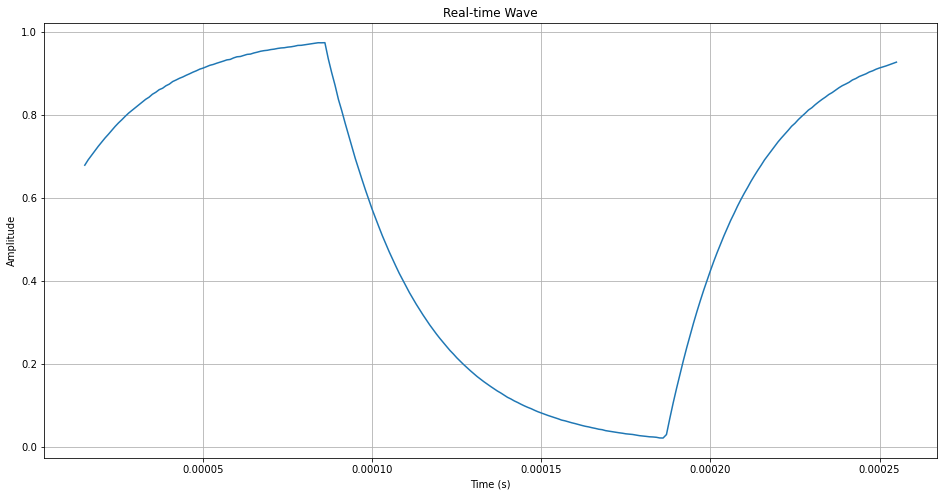

In [ ]:


# Define parameters
fs = 1000000  # Sampling frequency
t = np.linspace(0, 255/fs, 256)

# Update plot in a loop
while(1):

    dma.recvchannel.transfer(Rx_buffer)
    dma.recvchannel.wait()
    # Clear output and plot new sine wave
    clear_output(wait=True)
    plt.figure(figsize=(16, 8))
    plt.plot(t[15:], Rx_buffer[15:]/(2**16))
    #plt.ylim([0, 1])
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Real-time Wave')
    plt.grid()
    plt.show()
    
    time.sleep(0.1)  # Small delay to simulate real-time update